In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Example 1

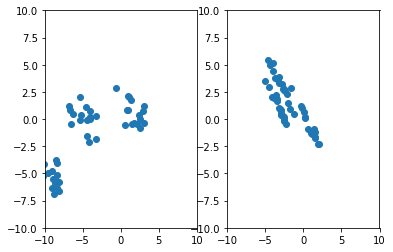

In [30]:
d1 = make_blobs(n_samples=50, random_state=170)[0]
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
d2 = np.dot(d1, transformation) 

plt.figure()
plt.subplot(1,2,1)
plt.scatter(d1[:,0],d1[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.subplot(1,2,2)
plt.scatter(d2[:,0],d2[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

In [28]:
model = PCA(n_components=2)
model.fit(d1)
d1pca = model.transform(d1)

model = PCA(n_components=2)
model.fit(d2)
d2pca = model.transform(d2)

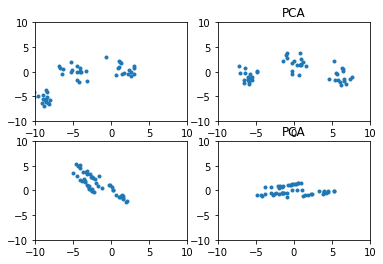

In [31]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(d1[:,0],d1[:,1],'.')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.subplot(2,2,2)
plt.title('PCA')
plt.plot(d1pca[:,0],d1pca[:,1],'.')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.subplot(2,2,3)
plt.plot(d2[:,0],d2[:,1],'.')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.subplot(2,2,4)
plt.title('PCA')
plt.plot(d2pca[:,0],d2pca[:,1],'.')
plt.xlim([-10,10])
plt.ylim([-10,10])

plt.show()

In [32]:
print(model.explained_variance_ratio_)

[0.91138607 0.08861393]


# Example 2

In [13]:
X,y = load_digits(return_X_y=True)
print('X',X.shape)

X (1797, 64)


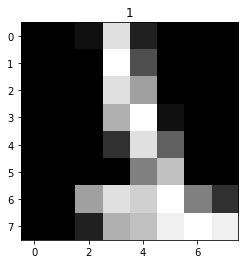

In [14]:
i = 1000
img = X[i,:]
label = y[i]
img = np.reshape(img,(8,8))
plt.title(label)
plt.imshow(img,cmap='gray')
plt.show()

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
model = PCA(n_components=2)
model.fit(Xtrain)
X2train = model.transform(Xtrain)

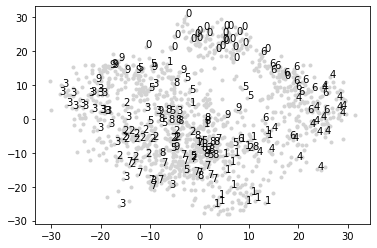

In [17]:
idx = np.random.permutation(len(X2train))[:200]

plt.figure()
plt.plot(X2train[:,0],X2train[:,1],'.',color='lightgray')
for i in idx:
    plt.text(X2train[i,0],X2train[i,1],str(ytrain[i]))
plt.show()

In [18]:
print(model.explained_variance_ratio_)

[0.14870031 0.13631282]


[1.48700307e-01 1.36312819e-01 1.20076302e-01 8.45954441e-02
 5.63897588e-02 4.92359652e-02 4.26269512e-02 3.56750500e-02
 3.33886752e-02 3.09762981e-02 2.38644587e-02 2.31836145e-02
 1.84609017e-02 1.76094833e-02 1.49145715e-02 1.44399060e-02
 1.33425704e-02 1.20314091e-02 1.01825456e-02 9.35663008e-03
 8.86570197e-03 7.94401834e-03 7.38379622e-03 7.21963027e-03
 6.61666884e-03 6.04174507e-03 5.78109620e-03 5.07542185e-03
 4.80219522e-03 4.25491178e-03 3.85070610e-03 3.49144303e-03
 3.30020409e-03 3.23040164e-03 2.97963377e-03 2.92775423e-03
 2.54680552e-03 2.32163379e-03 2.26096803e-03 2.14672756e-03
 1.85255176e-03 1.54541608e-03 1.47490042e-03 1.36751900e-03
 1.13053635e-03 1.06487835e-03 9.30176780e-04 8.45456196e-04
 5.16384945e-04 3.82314016e-04 2.29218278e-04 7.80342968e-05
 6.03049098e-05 4.69778608e-05 4.00961919e-05 1.65922509e-05
 7.54856281e-06 3.76120738e-06 1.02394749e-06 7.47508392e-07
 4.36249778e-07 7.14749869e-34 7.14749869e-34 6.83317080e-34]


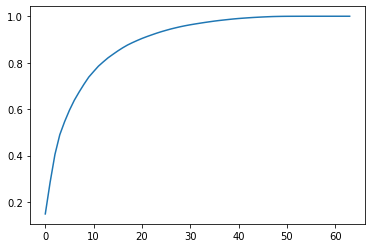

In [19]:
# Complete model
model = PCA(n_components=Xtrain.shape[1])
model.fit(Xtrain)
X2train = model.transform(Xtrain)
print(model.explained_variance_ratio_)

var_acc = np.cumsum(model.explained_variance_ratio_)

plt.figure()
plt.plot(var_acc)
plt.show()